This notebook is implementing the particle swarm optimization algorithm to find the best global value using ring topology.

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import copy

This is the problem we need to solve:
<br>

$$ Minimize: $$  $$ f(x,y) = (x+2y-7)^2 + (2x+y-5)^2 $$

$$ -10 \leqslant x,y \leqslant 10 $$

In [ ]:
def initpop(npop,x_max,x_min,v_max,dim):
  # Use this function to generate the initial population for the PSO
  #npop: population size
  #x_max: the upper limit for each decision variable (positions). [10,12]
  #x_min: the lower limit for each decision variable (positions). [1,2]
  #v_max: the upper limit for each decision variable (velocity). [2,4]
  #consider that the lower limit of the speed is equal to negative the upper limit
  #dim: number of decision variables
    x_id = np.zeros((npop,dim),dtype=float)
    v_id = np.zeros((npop,dim),dtype=float)
    for i in range(dim):
      x_id[:,i] = np.random.uniform(x_min[i],x_max[i],(npop))
      v_id[:,i] = np.random.uniform(-1*v_max[i],v_max[i],(npop))

    return x_id,v_id
  #x_id: the initial positions. Array of arrays of npop*dim
  #v_id: the initial velocities. Array f arrays of npop*dim


In [ ]:
x_id,v_id = initpop(3,[10,10],[-10,-10],[10 ,10],2)
print(x_id)
print("####")
print(v_id)

[[ 1.76626558  6.99580601]
 [-8.04963519  2.73180706]
 [ 9.53009209  7.58665853]]
####
[[-0.48934987 -2.26406937]
 [-7.36138229  1.09664381]
 [-2.79874859 -4.26211771]]
ERROR! Session/line number was not unique in database. History logging moved to new session 59


In [ ]:
def fitCalc(x_i):
  # Use this function to calculate the fitness for the particle
  #The function is Min z= (x+2y-7)^2 + (2x+y-5)^2
  #x_i: single particle position
  fitness = (x_i[0] + 2*x_i[1] - 7)**2 + (2*x_i[0] + x_i[1] -5)**2
  return fitness
  #fitness: the fitness value of a signle particle.


In [ ]:
fitCalc(x_id[0,:])

107.26293210067406

In [ ]:
def updatePid(x_i,x_fitness,p_i,particle_bestFit):
  #Use this function to find single particle best position (particle own history)
  #x_i: single particle position.
  #p_i: the particle best position across all the previous generations.
  #particle_best: particles best fintess values across all the previouse generations.
    if x_fitness < particle_bestFit:
      p_i = copy.deepcopy(x_i)

    return p_i
  #pi: the particle best position.


In [ ]:
def updatePgd(p_i,particle_bestFit,p_g,global_bestFit):
    #Use this function to find the best position in the population
    #p_i: a single particle best position
    #particle_bestFit: a particle fitness value associated to p_i.
    #p_g: a vector of 1*dim of representing the best position in the population across all the previouse generations
    #global_bestFit: fitness value associated to the p_g

    if particle_bestFit < global_bestFit:
      p_g = copy.deepcopy(p_i)
      global_bestFit = particle_bestFit

    return p_g,global_bestFit
  #p_g: the best position in the population.
  #global_bestFit: the best fitness in the population.

In [ ]:
def updateVidXid(p_i,p_g,x_i,v_i,c_cog,c_soc,dim):#Use this function to calculate new particle velocity and position
  #p_i: the particle best position across all the previouse generations.
  #p_g: a vector of 1*d of the best position in the population across all the previouse generations
  #x_i: single particle position.
  #v_i: single particle velocity.
  #c_cog: cognitive component accerlaration constant
  #c_soc: social component accerlaration constant

    r_cog = np.random.random(dim)
    r_soc = np.random.random(dim)
    v_i = np.array(v_i) + (c_cog * np.multiply(r_cog, np.subtract(p_i,x_i))) + (c_soc * np.multiply(r_soc, np.subtract(p_g,x_i)))
    x_i = np.array(x_i) + v_i

    return x_i,v_i


In [ ]:
def PSO(numItr,npop,x_max,x_min,v_max,dim,c_cog,c_soc):
    #Use this function to put all the PSO algorithm together for number of iterations
    #numItr: number of iterations.(generations)
    #npop: population size
    #x_max: the upper limit for each decision variable (positions). [10,12]
    #x_min: the lower limit for each decision variable (positions). [1,2]
    #v_max: the upper limit for each decision variable (velocity). [2,4]
    #c_cog: cognitive constant (c1)
    #c_soc: social constant (c2)
    #dim: the number of decision variable.

    #Intialize
    best_hist = np.zeros(numItr,dtype=float)
    x,v= initpop(npop,x_max,x_min,v_max,dim)
    p = x[:] #particles' own experience
    p_g = np.zeros(dim) #best position across all particles
    global_bestFit = 100000000000

    #repeat till number of iterations
    for iteration in range(numItr):

        #Update particle best position and global best position
        for i in range(npop):
            p[i] = updatePid(x[i],fitCalc(x[i]),p[i],fitCalc(p[i]))
            p_g,global_bestFit = updatePgd(p[i],fitCalc(p[i]),p_g,global_bestFit)

        best_hist[iteration] = global_bestFit

        #Update velocity and position
        for i in range(npop):
            x[i],v[i] = updateVidXid(p[i],p_g,x[i],v[i],c_cog,c_soc,dim)

    return  p_g, global_bestFit, best_hist
    #p_g: the position with the best fitness in the final generation.
    #global_bestFit: value associated to p_g

In [ ]:
numItr = 300
npop = 200
x_max = [10,10]
x_min = [-10,-10]
v_max = [8,8]
dim = 2
c_cog = 1.72
c_soc = 1.72

In [ ]:
p_g, global_bestFit,best_hist = PSO(numItr,npop,x_max,x_min,v_max,dim,c_cog,c_soc)

In [ ]:
p_g

array([0.92814778, 3.19404518])

In [ ]:
global_bestFit

0.10254074468430077

Text(0,0.5,'Fitness value')

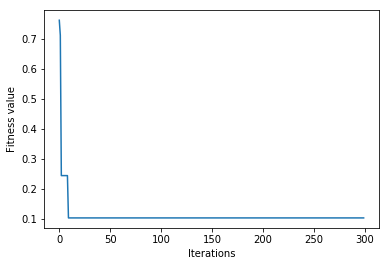

In [ ]:
plt.plot(best_hist)
plt.xlabel("Iterations")
plt.ylabel("Fitness value")